In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [270]:
train = pd.read_csv('C:\Projects\credits\data\\train.csv',  usecols = ['income_total', 'reality', 'gender', 'occyp_type', 'credit'])
test = pd.read_csv('C:\Projects\credits\data\\test.csv',  usecols = ['income_total', 'reality', 'gender', 'occyp_type'])

In [295]:
train

,gender,reality,income_total,occyp_type,credit
0,F,N,202500.0,etc,1.0
1,F,Y,247500.0,Laborers,1.0
2,M,Y,157500.0,Managers,1.0
3,F,Y,202500.0,Sales staff,0.0
4,F,Y,157500.0,Managers,1.0
...,...,...,...,...,...
26452,F,N,225000.0,Core staff,1.0
26453,F,Y,180000.0,etc,1.0
26454,F,N,292500.0,Core staff,1.0
26455,M,Y,171000.0,Laborers,1.0


In [294]:
test

,gender,reality,income_total,occyp_type
0,M,N,112500.0,etc
1,F,Y,135000.0,Core staff
2,F,Y,69372.0,Laborers
3,M,N,112500.0,Drivers
4,F,Y,225000.0,Managers
...,...,...,...,...
9995,F,Y,202500.0,Accountants
9996,M,Y,202500.0,Laborers
9997,F,Y,292500.0,Medicine staff
9998,F,N,180000.0,etc


In [271]:
train_and_test =[train, test]

In [272]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        26457 non-null  object 
 1   reality       26457 non-null  object 
 2   income_total  26457 non-null  float64
 3   occyp_type    18286 non-null  object 
 4   credit        26457 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.0+ MB


In [273]:
train.isnull().sum()

gender             0
reality            0
income_total       0
occyp_type      8171
credit             0
dtype: int64

In [274]:
train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [275]:
train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [276]:
train.head()

,gender,reality,income_total,occyp_type,credit
0,F,N,202500.0,NaN,1.0
1,F,Y,247500.0,Laborers,1.0
2,M,Y,450000.0,Managers,2.0
3,F,Y,202500.0,Sales staff,0.0
4,F,Y,157500.0,Managers,2.0


In [277]:
train['income_total']

0        202500.0
1        247500.0
2        450000.0
3        202500.0
4        157500.0
           ...   
26452    225000.0
26453    180000.0
26454    292500.0
26455    171000.0
26456     81000.0
Name: income_total, Length: 26457, dtype: float64

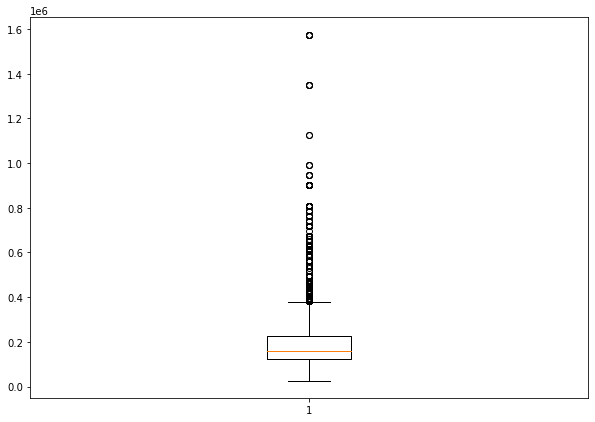

In [278]:
fig = plt.figure(figsize=(10, 7))
plt.boxplot(train['income_total'])
plt.show()

In [279]:
Q1 = train['income_total'].quantile(q = 0.25)
Q2 = train['income_total'].quantile(q = 0.50)
Q3 = train['income_total'].quantile(q = 0.75)
IQR = Q3 - Q1

filter_train = (train['income_total'] >= Q1 - 1.5 * IQR) & (train['income_total'] <= Q3 + 1.5 *IQR)

In [280]:
Q1 = test['income_total'].quantile(q = 0.25)
Q2 = test['income_total'].quantile(q = 0.50)
Q3 = test['income_total'].quantile(q = 0.75)
IQR = Q3 - Q1

filter_test = (test['income_total'] >= Q1 - 1.5 * IQR) & (test['income_total'] <= Q3 + 1.5 *IQR)

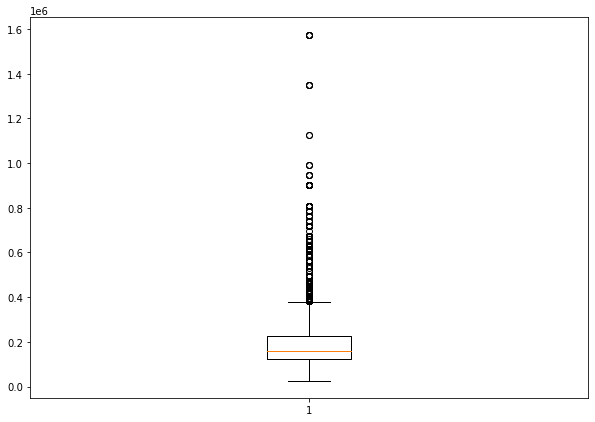

In [281]:
fig = plt.figure(figsize=(10, 7))
plt.boxplot(train['income_total'])
plt.show()

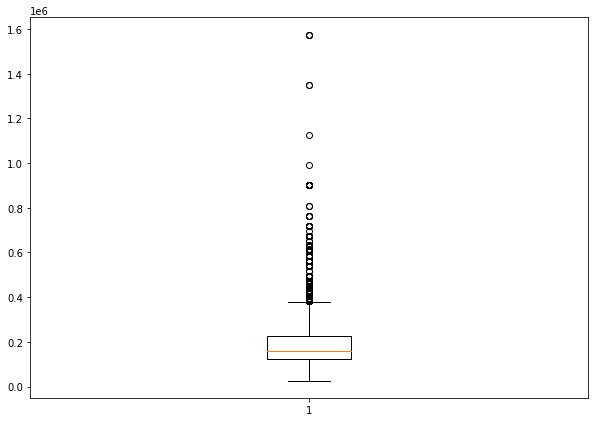

In [282]:
fig = plt.figure(figsize=(10, 7))
plt.boxplot(test['income_total'])
plt.show()

In [283]:
train.loc[filter_train == 0,'income_total'] = Q2
test.loc[filter_test == 0,'income_total'] = Q2

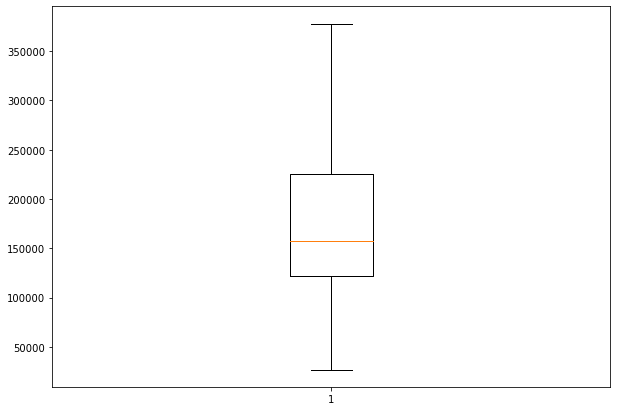

In [284]:
fig = plt.figure(figsize=(10, 7))
plt.boxplot(train['income_total'])
plt.show()

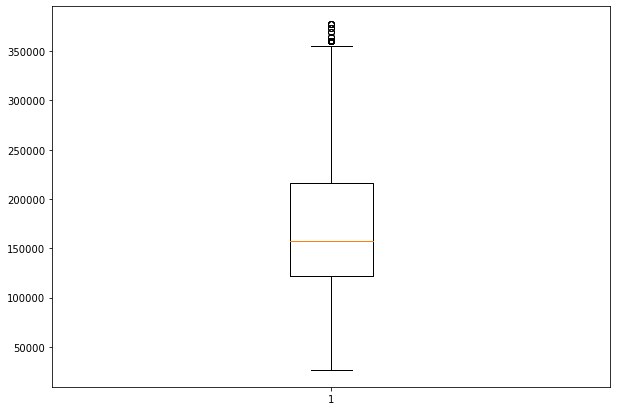

In [285]:
fig = plt.figure(figsize=(10, 7))
plt.boxplot(test['income_total'])
plt.show()

In [286]:
for dataset in train_and_test:
    train['credit'] = train['credit'].replace(2,1)

In [287]:
for dataset in train_and_test:
    dataset['occyp_type'] = dataset['occyp_type'].fillna('etc')

In [299]:
y = train['credit']
X = train[['gender', 'income_total', 'occyp_type', 'reality']]
X = pd.get_dummies(X, drop_first=True)

X_test = test[['gender', 'income_total', 'occyp_type', 'reality']]
X_test = pd.get_dummies(X_test, drop_first=True)

clf = RandomForestClassifier(max_depth=2, random_state=1)
clf.fit(X, y)
clf.predict(X)
score_train = (cross_val_score(clf, X, y).mean()*100)
print(score_train)


87.82174925032068


In [302]:
len(clf.predict(X))
clf.predict(X)

array([1., 1., 1., ..., 1., 1., 1.])